# Project1: Prostate DataSet <br> Linear and Regularized Regression

## Author: Dianna Hummel

In [1]:
# Ignore warning
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

C:\Users\Dianna\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


##### Step A

In [2]:
pros_data = pd.read_csv("prostate_data.csv")

In [3]:
pros_data.shape

(97, 10)

In [4]:
pros_data.dtypes

id           int64
lcavol     float64
lweight    float64
age          int64
lbph       float64
svi          int64
lcp        float64
gleason      int64
pgg45        int64
lpsa       float64
dtype: object

In [5]:
pros_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,97.0,49.000000,28.145456,1.000000,25.000000,49.000000,73.000000,97.000000
lcavol,97.0,1.350010,1.178625,-1.347074,0.512824,1.446919,2.127041,3.821004
lweight,97.0,3.628943,0.428411,2.374906,3.375880,3.623007,3.876396,4.780383
age,97.0,63.865979,7.445117,41.000000,60.000000,65.000000,68.000000,79.000000
lbph,97.0,0.100356,1.450807,-1.386294,-1.386294,0.300105,1.558145,2.326302
svi,97.0,0.216495,0.413995,0.000000,0.000000,0.000000,0.000000,1.000000
lcp,97.0,-0.179366,1.398250,-1.386294,-1.386294,-0.798508,1.178655,2.904165
gleason,97.0,6.752577,0.722134,6.000000,6.000000,7.000000,7.000000,9.000000
pgg45,97.0,24.381443,28.204035,0.000000,0.000000,15.000000,40.000000,100.000000
lpsa,97.0,2.478387,1.154329,-0.430783,1.731656,2.591516,3.056357,5.582932


In [6]:
pros_data['gleason'].value_counts()

7    56
6    35
9     5
8     1
Name: gleason, dtype: int64

In [7]:
pros_data['svi'].value_counts()

0    76
1    21
Name: svi, dtype: int64

##### Step B

In [8]:
pros_corr = pros_data.corr()
pros_corr

,id,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
id,1.000000,0.711136,0.440072,0.196556,0.167928,0.566780,0.533696,0.393608,0.449727,0.958115
lcavol,0.711136,1.000000,0.280521,0.225000,0.027350,0.538845,0.675310,0.432417,0.433652,0.734460
lweight,0.440072,0.280521,1.000000,0.347969,0.442264,0.155385,0.164537,0.056882,0.107354,0.433319
age,0.196556,0.225000,0.347969,1.000000,0.350186,0.117658,0.127668,0.268892,0.276112,0.169593
lbph,0.167928,0.027350,0.442264,0.350186,1.000000,-0.085843,-0.006999,0.077820,0.078460,0.179809
svi,0.566780,0.538845,0.155385,0.117658,-0.085843,1.000000,0.673111,0.320412,0.457648,0.566218
lcp,0.533696,0.675310,0.164537,0.127668,-0.006999,0.673111,1.000000,0.514830,0.631528,0.548813
gleason,0.393608,0.432417,0.056882,0.268892,0.077820,0.320412,0.514830,1.000000,0.751905,0.368987
pgg45,0.449727,0.433652,0.107354,0.276112,0.078460,0.457648,0.631528,0.751905,1.000000,0.422316
lpsa,0.958115,0.734460,0.433319,0.169593,0.179809,0.566218,0.548813,0.368987,0.422316,1.000000


In [9]:
grps = ['NegStrong','NegMedium','Weak','PosMedium','PosStrong']
cols = ['id', 'lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45', 'lpsa']
for col in cols:
    pros_corr[col] = pd.cut (pros_corr[col],(-1, -0.65, -0.3, 0.3, 0.65, 1), labels = grps)
pros_corr

,id,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
id,PosStrong,PosStrong,PosMedium,Weak,Weak,PosMedium,PosMedium,PosMedium,PosMedium,PosStrong
lcavol,PosStrong,PosStrong,Weak,Weak,Weak,PosMedium,PosStrong,PosMedium,PosMedium,PosStrong
lweight,PosMedium,Weak,PosStrong,PosMedium,PosMedium,Weak,Weak,Weak,Weak,PosMedium
age,Weak,Weak,PosMedium,PosStrong,PosMedium,Weak,Weak,Weak,Weak,Weak
lbph,Weak,Weak,PosMedium,PosMedium,PosStrong,Weak,Weak,Weak,Weak,Weak
svi,PosMedium,PosMedium,Weak,Weak,Weak,PosStrong,PosStrong,PosMedium,PosMedium,PosMedium
lcp,PosMedium,PosStrong,Weak,Weak,Weak,PosStrong,PosStrong,PosMedium,PosMedium,PosMedium
gleason,PosMedium,PosMedium,Weak,Weak,Weak,PosMedium,PosMedium,PosStrong,PosStrong,PosMedium
pgg45,PosMedium,PosMedium,Weak,Weak,Weak,PosMedium,PosMedium,PosStrong,PosStrong,PosMedium
lpsa,PosStrong,PosStrong,PosMedium,Weak,Weak,PosMedium,PosMedium,PosMedium,PosMedium,PosStrong


In [10]:
pros_data1 = pros_data.drop(['id','lcavol', 'svi', 'lcp', 'gleason', 'pgg45'], axis =1)

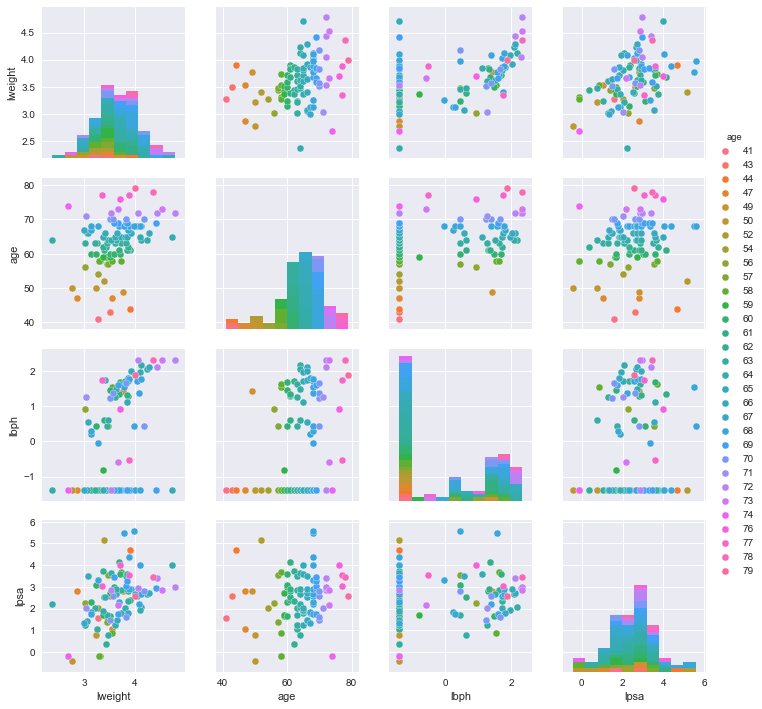

In [11]:
sns.pairplot (pros_data1, hue = 'age', size=2.5)

In [12]:
pros_data2 = pros_data.drop(['id', 'lweight', 'age', 'lbph'], axis =1)

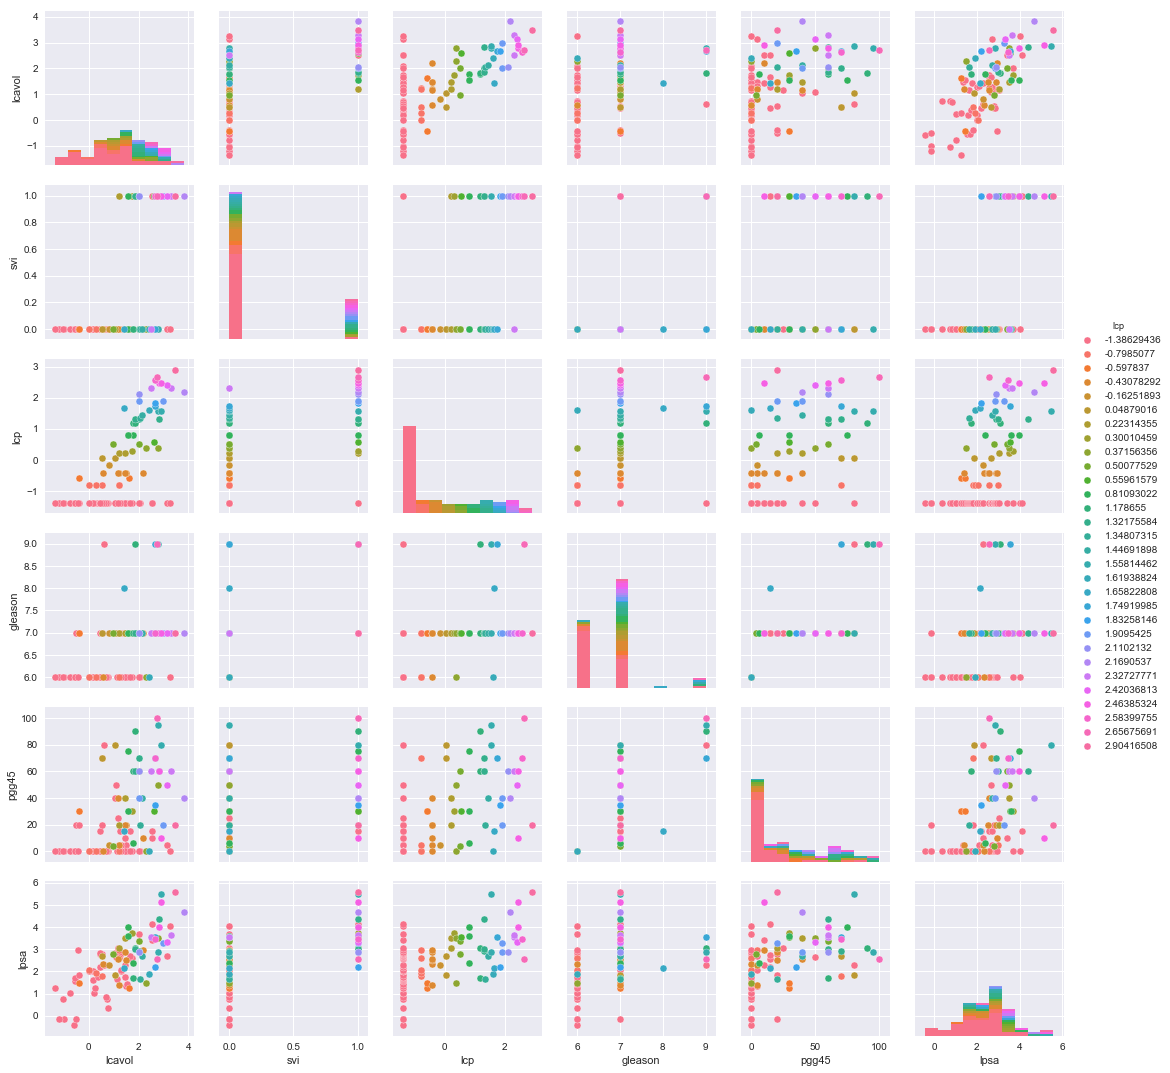

In [13]:
sns.pairplot (pros_data2, hue = 'lcp', size=2.5)

##### Step C

In [14]:
Y = pros_data[['lpsa']]
X = pros_data.drop(['lpsa', 'id'], axis=1)
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
X_std[:5]

array([[-1.64586143, -2.01663373, -1.87210098, -1.03002898, -0.52565748,
        -0.86765522, -1.04757113, -0.86895727],
       [-1.9993129 , -0.72575948, -0.79198919, -1.03002898, -0.52565748,
        -0.86765522, -1.04757113, -0.86895727],
       [-1.58702059, -2.20015441,  1.36823439, -1.03002898, -0.52565748,
        -0.86765522,  0.34440695, -0.15615511],
       [-2.17817387, -0.8121913 , -0.79198919, -1.03002898, -0.52565748,
        -0.86765522, -1.04757113, -0.86895727],
       [-0.5105128 , -0.46121762, -0.25193329, -1.03002898, -0.52565748,
        -0.86765522, -1.04757113, -0.86895727]])

In [15]:
#back up original of predictor matrix
X_std0 = X_std
X_std0

array([[-1.64586143, -2.01663373, -1.87210098, -1.03002898, -0.52565748,
        -0.86765522, -1.04757113, -0.86895727],
       [-1.9993129 , -0.72575948, -0.79198919, -1.03002898, -0.52565748,
        -0.86765522, -1.04757113, -0.86895727],
       [-1.58702059, -2.20015441,  1.36823439, -1.03002898, -0.52565748,
        -0.86765522,  0.34440695, -0.15615511],
       [-2.17817387, -0.8121913 , -0.79198919, -1.03002898, -0.52565748,
        -0.86765522, -1.04757113, -0.86895727],
       [-0.5105128 , -0.46121762, -0.25193329, -1.03002898, -0.52565748,
        -0.86765522, -1.04757113, -0.86895727],
       [-2.04670586, -0.93880639, -1.87210098, -1.03002898, -0.52565748,
        -0.86765522, -1.04757113, -0.86895727],
       [-0.5226677 , -0.3646778 ,  0.01809466,  0.35670122, -0.52565748,
        -0.86765522, -1.04757113, -0.86895727],
       [-0.56020767, -0.20984103, -0.79198919,  0.99529051, -0.52565748,
        -0.86765522, -1.04757113, -0.86895727],
       [-1.81362657, -0.20984103

In [16]:
# model 1
X_std = sm.add_constant (X_std)
pros_model0 = sm.OLS (Y, X_std)
pros_model0 = pros_model0.fit()
pros_model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     21.68
Date:                Sat, 11 Nov 2017   Prob (F-statistic):           7.65e-18
Time:                        11:43:18   Log-Likelihood:                -98.248
No. Observations:                  97   AIC:                             214.5
Df Residuals:                      88   BIC:                             237.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4784      0.071     34.895      0.000       2.337       2.620
x1             0.6617      0.103      6.425      0.000       0.457       0.866
x2             0.2651      0.086      3.096      0.003       0.095       0.435
x3            -0.1574      0.082     -1.917      0.058      -0.321       0.006
x4             0.1396      0.084      1.670      0.098      -0.027       0.306
x5             0.3137      0.099      3.158      0.002       0.116       0.511
x6            -0.1475      0.125     -1.180      0.241      -0.396       0.101
x7             0.0354      0.112      0.317      0.752      -0.186       0.257
x8             0.1251      0.122      1.021      0.310      -0.118       0.368
==============================================================================
Omnibus:                        0.563   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.755   Jarque-Bera (JB):                0.183
Skew:                           0.017   Prob(JB):                        0.913
Kurtosis:                       3.210   Cond. No.                         4.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# model 2
X_std1 = np.delete(X_std, [7], axis=1)
X_std = sm.add_constant (X_std1)
pros_model0 = sm.OLS (Y, X_std1)
pros_model0 = pros_model0.fit()
pros_model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     25.01
Date:                Sat, 11 Nov 2017   Prob (F-statistic):           1.54e-18
Time:                        11:43:18   Log-Likelihood:                -98.303
No. Observations:                  97   AIC:                             212.6
Df Residuals:                      89   BIC:                             233.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4784      0.071     35.073      0.000       2.338       2.619
x1             0.6678      0.101      6.634      0.000       0.468       0.868
x2             0.2619      0.085      3.096      0.003       0.094       0.430
x3            -0.1549      0.081     -1.905      0.060      -0.316       0.007
x4             0.1405      0.083      1.691      0.094      -0.025       0.306
x5             0.3099      0.098      3.159      0.002       0.115       0.505
x6            -0.1460      0.124     -1.175      0.243      -0.393       0.101
x7             0.1494      0.095      1.573      0.119      -0.039       0.338
==============================================================================
Omnibus:                        0.550   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.759   Jarque-Bera (JB):                0.175
Skew:                           0.018   Prob(JB):                        0.916
Kurtosis:                       3.205   Cond. No.                         3.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# model 3
X_std2 = np.delete(X_std, [6], axis=1)
X_std = sm.add_constant (X_std2)
pros_model0 = sm.OLS (Y, X_std2)
pros_model0 = pros_model0.fit()
pros_model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     28.83
Date:                Sat, 11 Nov 2017   Prob (F-statistic):           5.29e-19
Time:                        11:43:18   Log-Likelihood:                -99.049
No. Observations:                  97   AIC:                             212.1
Df Residuals:                      90   BIC:                             230.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4784      0.071     34.999      0.000       2.338       2.619
x1             0.6138      0.090      6.840      0.000       0.436       0.792
x2             0.2622      0.085      3.094      0.003       0.094       0.431
x3            -0.1410      0.081     -1.749      0.084      -0.301       0.019
x4             0.1378      0.083      1.655      0.101      -0.028       0.303
x5             0.2619      0.089      2.930      0.004       0.084       0.439
x6             0.0989      0.085      1.165      0.247      -0.070       0.267
==============================================================================
Omnibus:                        0.353   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.838   Jarque-Bera (JB):                0.141
Skew:                          -0.088   Prob(JB):                        0.932
Kurtosis:                       3.064   Cond. No.                         2.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# model 4
X_std3 = np.delete(X_std, [6], axis=1)
X_std = sm.add_constant (X_std3)
pros_model0 = sm.OLS (Y, X_std3)
pros_model0 = pros_model0.fit()
pros_model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     34.19
Date:                Sat, 11 Nov 2017   Prob (F-statistic):           1.65e-19
Time:                        11:43:18   Log-Likelihood:                -99.776
No. Observations:                  97   AIC:                             211.6
Df Residuals:                      91   BIC:                             227.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4784      0.071     34.931      0.000       2.337       2.619
x1             0.6379      0.088      7.289      0.000       0.464       0.812
x2             0.2507      0.084      2.972      0.004       0.083       0.418
x3            -0.1218      0.079     -1.540      0.127      -0.279       0.035
x4             0.1461      0.083      1.758      0.082      -0.019       0.311
x5             0.2944      0.085      3.461      0.001       0.125       0.463
==============================================================================
Omnibus:                        0.440   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.803   Jarque-Bera (JB):                0.290
Skew:                          -0.134   Prob(JB):                        0.865
Kurtosis:                       3.005   Cond. No.                         2.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# model 5
X_std4 = np.delete(X_std, [3], axis=1)
X_std = sm.add_constant (X_std4)
pros_model0 = sm.OLS (Y, X_std4)
pros_model0 = pros_model0.fit()
pros_model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     41.53
Date:                Sat, 11 Nov 2017   Prob (F-statistic):           7.54e-20
Time:                        11:43:18   Log-Likelihood:                -101.02
No. Observations:                  97   AIC:                             212.0
Df Residuals:                      92   BIC:                             224.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4784      0.071     34.673      0.000       2.336       2.620
x1             0.6197      0.087      7.094      0.000       0.446       0.793
x2             0.2285      0.084      2.729      0.008       0.062       0.395
x3             0.1134      0.081      1.401      0.165      -0.047       0.274
x4             0.2906      0.086      3.392      0.001       0.120       0.461
==============================================================================
Omnibus:                        0.285   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.867   Jarque-Bera (JB):                0.277
Skew:                          -0.122   Prob(JB):                        0.871
Kurtosis:                       2.906   Cond. No.                         1.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# model 6/ best model
X_std5 = np.delete(X_std, [3], axis=1)
X_std = sm.add_constant (X_std5)
pros_model0 = sm.OLS (Y, X_std5)
pros_model0 = pros_model0.fit()
pros_model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     54.15
Date:                Sat, 11 Nov 2017   Prob (F-statistic):           2.44e-20
Time:                        11:43:18   Log-Likelihood:                -102.05
No. Observations:                  97   AIC:                             212.1
Df Residuals:                      93   BIC:                             222.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4784      0.072     34.495      0.000       2.336       2.621
x1             0.6166      0.088      7.024      0.000       0.442       0.791
x2             0.2820      0.075      3.768      0.000       0.133       0.431
x3             0.2742      0.085      3.214      0.002       0.105       0.444
==============================================================================
Omnibus:                        0.099   Durbin-Watson:                   1.501
Prob(Omnibus):                  0.952   Jarque-Bera (JB):                0.215
Skew:                          -0.069   Prob(JB):                        0.898
Kurtosis:                       2.815   Cond. No.                         1.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Step D

In [23]:
X_stdB = np.delete(X_std0, [2,3,5,6,7], axis=1)

R2_scores_list = []
RMSE_scores_list = []
coeff_list = []
intercept_list = []
for rs in [0, 5, 10, 15, 20, 25]:
# Fit the model to produce a set of predictions
# using random_state = rs
    lr = LinearRegression()
    X_train, X_test, Y_train, Y_test = train_test_split(X_stdB, Y, random_state = rs, test_size=0.2)
    model = lr.fit(X_train, Y_train)
    Y_pred = lr.predict(X_test)
    coeff_list.append (model.coef_)
    intercept_list.append (model.intercept_)
    R2_scores_list.append (model.score(X_test, Y_test))
    RMSE_scores_list.append ( np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print ('Coefficients:', coeff_list)
print()
print ('Intercepts:', intercept_list)
print()
print ('R-Squared Scores:', R2_scores_list)
print()
print ('RMSE:', RMSE_scores_list)
print()
print ('Mean R-Squared Score:', sum(R2_scores_list) / len(R2_scores_list))
print()
print ("Mean RMSE:", sum(RMSE_scores_list) / len(RMSE_scores_list))

Coefficients: [array([[ 0.66640693,  0.23104859,  0.25078784]]), array([[ 0.64573699,  0.36840732,  0.28152755]]), array([[ 0.57403644,  0.25285829,  0.28447265]]), array([[ 0.66101933,  0.28367839,  0.16031478]]), array([[ 0.56211517,  0.24708144,  0.3242034 ]]), array([[ 0.59748088,  0.28206767,  0.28400069]])]

Intercepts: [array([ 2.45239196]), array([ 2.48447089]), array([ 2.46491004]), array([ 2.44029399]), array([ 2.51263265]), array([ 2.48074637])]

R-Squared Scores: [0.59865318388824185, -0.78039061057308223, 0.72667794167148481, 0.61982795768853483, 0.70938682298484945, 0.56297348383231005]

RMSE: [0.65980161903990364, 0.75555934010630588, 0.66619607795646729, 0.67834835630408163, 0.71244935484865801, 0.85450869683153952]

Mean R-Squared Score: 0.406188129915

Mean RMSE: 0.721143907514


In [26]:
R2_scores_list = []
RMSE_scores_list = []
coeff_list = []
intercept_list = []
for rs in range(50):
# Fit the model to produce a set of predictions
# using random_state = rs
    lr = LinearRegression()
    X_train, X_test, Y_train, Y_test = train_test_split(X_stdB, Y, random_state = rs, test_size=0.2)
    model = lr.fit(X_train, Y_train)
    Y_pred = lr.predict(X_test)
    coeff_list.append (model.coef_)
    intercept_list.append (model.intercept_)
    R2_scores_list.append (model.score(X_test, Y_test))
    RMSE_scores_list.append ( np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print ('Mean R-Squared Score:', sum(R2_scores_list) / len(R2_scores_list))
print()
print ("Mean RMSE:", sum(RMSE_scores_list) / len(RMSE_scores_list))

Mean R-Squared Score: 0.521923383711

Mean RMSE: 0.743420645542


##### Step E

In [29]:
R2_scores_list = []
RMSE_scores_list = []
coeff_list = []
intercept_list = []
alpha_list = []
for rs in [0, 5, 10, 25]:
# Fit the model to produce a set of predictions
# using random_state = rs
    lr = Ridge()
    X_train, X_test, Y_train, Y_test = train_test_split(X_stdB, Y, random_state = rs, test_size=0.2)
    model = lr.fit(X_train, Y_train)
    Y_pred = lr.predict(X_test)
    coeff_list.append (model.coef_)
    intercept_list.append (model.intercept_)
    alpha_list.append(model.alpha)
    R2_scores_list.append (model.score(X_test, Y_test))
    RMSE_scores_list.append ( np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print ('Coefficients:', coeff_list)
print()
print ('Intercepts:', intercept_list)
print()
print ('Alpha:', alpha_list)
print()
print ('R-Squared Scores:', R2_scores_list)
print()
print ('RMSE:', RMSE_scores_list)
print()
print ('Mean R-Squared Score:', sum(R2_scores_list) / len(R2_scores_list))
print()
print ("Mean RMSE:", sum(RMSE_scores_list) / len(RMSE_scores_list))

Coefficients: [array([[ 0.65610539,  0.23088743,  0.25329498]]), array([[ 0.63908467,  0.3650266 ,  0.28242892]]), array([[ 0.56626753,  0.25132518,  0.28522921]]), array([[ 0.59086617,  0.28013284,  0.28335373]])]

Intercepts: [array([ 2.45315716]), array([ 2.4846695]), array([ 2.46556464]), array([ 2.48000194])]

Alpha: [1.0, 1.0, 1.0, 1.0]

R-Squared Scores: [0.60088396399125332, -0.76021207500999965, 0.72430025060970538, 0.56237237804486051]

RMSE: [0.65796539757062145, 0.75126547156869883, 0.66908749927051225, 0.85509615960682905]

Mean R-Squared Score: 0.281836129409

Mean RMSE: 0.733353632004


In [31]:
R2_scores_list = []
RMSE_scores_list = []
coeff_list = []
intercept_list = []
alpha_list = []
for rs in [0, 5, 10, 25]:
# Fit the model to produce a set of predictions
# using random_state = rs
    lr = Lasso()
    X_train, X_test, Y_train, Y_test = train_test_split(X_stdB, Y, random_state = rs, test_size=0.2)
    model = lr.fit(X_train, Y_train)
    Y_pred = lr.predict(X_test)
    coeff_list.append (model.coef_)
    intercept_list.append (model.intercept_)
    alpha_list.append(model.alpha)
    R2_scores_list.append (model.score(X_test, Y_test))
    RMSE_scores_list.append ( np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print ('Coefficients:', coeff_list)
print()
print ('Intercepts:', intercept_list)
print()
print ('Alpha:', alpha_list)
print()
print ('R-Squared Scores:', R2_scores_list)
print()
print ('RMSE:', RMSE_scores_list)
print()
print ('Mean R-Squared Score:', sum(R2_scores_list) / len(R2_scores_list))
print()
print ("Mean RMSE:", sum(RMSE_scores_list) / len(RMSE_scores_list))

Coefficients: [array([ 0.,  0.,  0.]), array([ 0.04461358,  0.        ,  0.        ]), array([ 0.,  0.,  0.]), array([ 0.,  0.,  0.])]

Intercepts: [array([ 2.53335755]), array([ 2.53216473]), array([ 2.52411679]), array([ 2.38761917])]

Alpha: [1.0, 1.0, 1.0, 1.0]

R-Squared Scores: [-0.06552975743199374, -0.20772052383091744, -0.030293866642920442, -0.11599012234799111]

RMSE: [1.0750687978027271, 0.62229190901335407, 1.2934370217228268, 1.3655033451547152]

Mean R-Squared Score: -0.104883567563

Mean RMSE: 1.08907526842
